In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing

In [2]:
dataset = pd.read_excel('LRFSOPQTY.xlsx', sheetname ='Source Data')

In [3]:
dataset.head()

,Year,Oil Price,Total Sales,Qty MC205
0,2016-01-01,29.78,1380587.63,26
1,2016-02-01,31.03,970876.71,30
2,2016-03-03,37.34,867645.65,62
3,2016-04-03,40.75,449015.42,6
4,2016-05-04,45.94,478956.43,126


In [4]:
dataset.set_index('Year')

,Oil Price,Total Sales,Qty MC205
Year,,,
2016-01-01,29.78,1380587.63,26
2016-02-01,31.03,970876.71,30
2016-03-03,37.34,867645.65,62
2016-04-03,40.75,449015.42,6
2016-05-04,45.94,478956.43,126
2016-06-04,47.69,689156.57,26
2016-07-05,44.13,714379.72,6
2016-08-05,44.88,718470.11,57
2016-09-05,45.04,686869.04,35


In [5]:
dataset.describe()

,Oil Price,Total Sales,Qty MC205
count,30.000000,3.000000e+01,30.000000
mean,51.917000,1.119635e+06,79.100000
std,10.954843,4.677316e+05,77.578592
min,29.780000,4.490154e+05,2.000000
25%,45.430000,7.428682e+05,26.750000
50%,50.420000,1.075392e+06,40.500000
75%,58.677500,1.299621e+06,123.500000
max,74.030000,2.510332e+06,254.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
Year           30 non-null datetime64[ns]
Oil Price      30 non-null float64
Total Sales    30 non-null float64
Qty MC205      30 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 1.0 KB


In [7]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

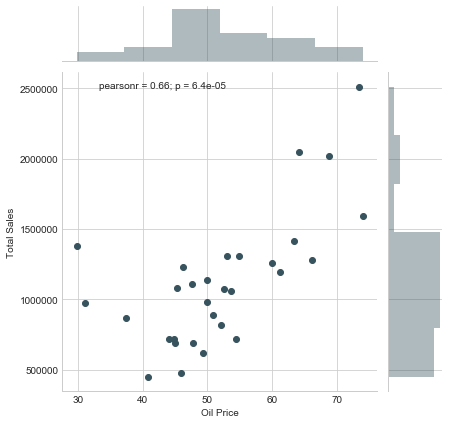

In [13]:
sns.jointplot(x='Oil Price', y='Total Sales',data=dataset)

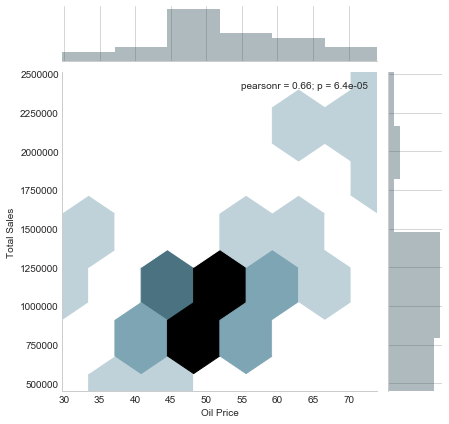

In [17]:
sns.jointplot(x='Oil Price', y='Total Sales',kind ='hex',data=dataset)

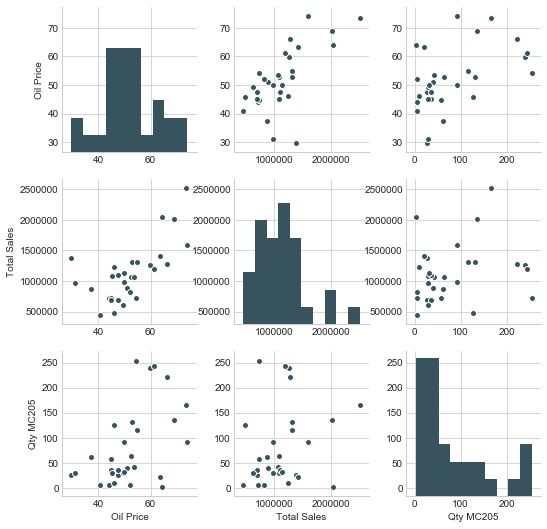

In [18]:
sns.pairplot(dataset)

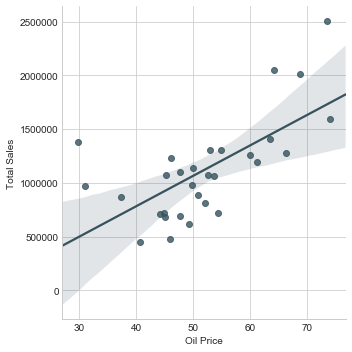

In [50]:
sns.lmplot(x='Oil Price',y='Total Sales',data=dataset)

In [33]:
y = dataset['Total Sales']

In [34]:
X = dataset[['Oil Price']]

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lm = LinearRegression()

In [39]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 16085.52551129]


In [41]:
predictions = lm.predict(X_test)

Text(0,0.5,'Predicted Y')

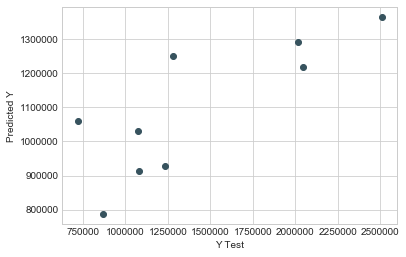

In [42]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [43]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 406893.28269
MSE: 307574530897.0
RMSE: 554594.023495


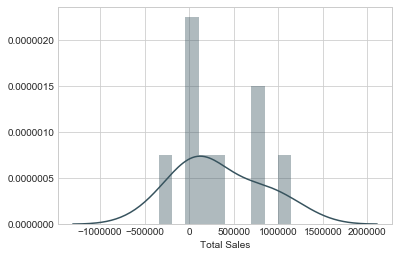

In [44]:
sns.distplot((y_test-predictions),bins=10);

In [45]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Oil Price,16085.525511


In [46]:
lm.intercept_

185133.48999189772

In [49]:
(16085.53*71)+lm.intercept_

1327206.1199918978

In [52]:
from sklearn.metrics import r2_score

In [56]:
r2_score(y_test,predictions)

0.085601205287293536